**Задание 1. Работа с реальными данными (20 баллов)**

В биоинформатике часто приходится работать с табличными данными (gff, bed, vcf и т.д.), однако в терминале делать различные продвинутые операции довольно трудно, тут нам и приходит на помощь пандас.

В прикреплённых файлах лежит аннотация рибосомальной РНК некоторого метагеномного датасета в формате GFF (**rrna_annotation.gff**), а также файл с выравниванием метагеномной сборки на этот же датасет в формате BED 6 (**alignment.bed**).

- Напишите функции **read_gff** и **read_bed6** для чтения соответствующих форматов. Они должны возвращать датафреймы как в примере (картинка **Example1**), но имена колонок можно сделать любыми.
- Колонка с атрибутами несёт слишком много избыточной информации и ей не удобно пользоваться, оставьте в ней только данные о типе рРНК одной короткой строкой (16S, 23S, 5S).
- Сделайте таблицу, где для каждой хромосомы (на самом деле это не хромосомы, а референсные геномы) показано количество рРНК каждого типа. Постройте barplot, отображающий эти данные (картинка **rRNA_barplot**)
- Далее самое интересное. Мы хотим узнать сколько рРНК в процессе сборки успешно собралось. Для этого можно воспользоваться программой **bedtools intersect** и пересечь эти два файла. В результате сохранятся только записи об рРНК, интервал которой перекрывался с интервалом контига в выравнивании, это означает, что это ген есть в сборке. Но забудьте про bedtools! У нас тут вообще-то пандас! Поэтому давайте получим такой же результат в нём. Выведите таблицу, содержащую исходные записи об рРНК **полностью** вошедших в сборку (не фрагментом), а также запись о контиге в который эта РНК попала. Итоговая таблица должна выглядеть примерно так (картинка **Example2**). Обратите внимание, что в один контиг может попасть несколько рРНК.

In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.ticker as tck
from matplotlib import rc,rcParams

In [6]:
def read_gff(file):
    gff_table = pd.read_csv(file, sep='\t', header = 0, names= ['chromosome', 
                                                           'source', 'type',
                                                           'start', 'end',
                                                           'score', 'strand',
                                                           'phase', 'RNA type'])
    return gff_table

def read_bed6(file):
    bed_table = pd.read_csv(file, sep='\t', names = ['chromosome','start',
                                                     'end','name','score',
                                                     'strand'])
    return bed_table


In [8]:
read_bed6('alignment.bed')

,chromosome,start,end,name,score,strand
0,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
4,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-
...,...,...,...,...,...,...
7705,Reference_26,5532432,5535601,NODE_1329_length_3169_cov_103.935132,5,+
7706,Reference_26,5535546,5535722,NODE_19238_length_176_cov_67.305785,0,+
7707,Reference_26,5535667,5537226,NODE_2001_length_1559_cov_98.029920,0,+
7708,Reference_26,5537171,5537343,NODE_19245_length_172_cov_84.367521,0,+


In [9]:
read_gff('rrna_annotation.gff')


,chromosome,source,type,start,end,score,strand,phase,RNA type
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,Name=23S_rRNA;product=23S ribosomal RNA
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,Name=5S_rRNA;product=5S ribosomal RNA
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,Name=5S_rRNA;product=5S ribosomal RNA
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,Name=23S_rRNA;product=23S ribosomal RNA


In [7]:
gff_table = read_gff('rrna_annotation.gff')
gff_table['RNA type'] = gff_table['RNA type'].str.extract(r'([0-9]+S )')
gff_table

,chromosome,source,type,start,end,score,strand,phase,RNA type
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,23S
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,16S
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,23S
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,23S
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,23S
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,5S
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,23S


Сделайте таблицу, где для каждой хромосомы (на самом деле это не хромосомы, а референсные геномы) показано количество рРНК каждого типа.

In [11]:
gff_table = read_gff('rrna_annotation.gff')
counted_RNA = gff_table.groupby(['chromosome','RNA type']).agg({'RNA type': 'count'})
counted_RNA

RNA type
chromosome   RNA type                                         
Reference_1  Name=16S_rRNA;product=16S ribosomal RNA         2
             Name=23S_rRNA;product=23S ribosomal RNA         2
             Name=5S_rRNA;product=5S ribosomal RNA           2
Reference_10 Name=16S_rRNA;product=16S ribosomal RNA         5
             Name=23S_rRNA;product=23S ribosomal RNA         5
...                                                        ...
Reference_8  Name=16S_rRNA;product=16S ribosomal RNA         2
             Name=23S_rRNA;product=23S ribosomal RNA         2
Reference_9  Name=16S_rRNA;product=16S ribosomal RNA         6
             Name=23S_rRNA;product=23S ribosomal RNA         6
             Name=5S_rRNA;product=5S ribosomal RNA           6

[81 rows x 1 columns]

Постройте barplot, отображающий эти данные (картинка rRNA_barplot)

<AxesSubplot: xlabel='chromosome'>

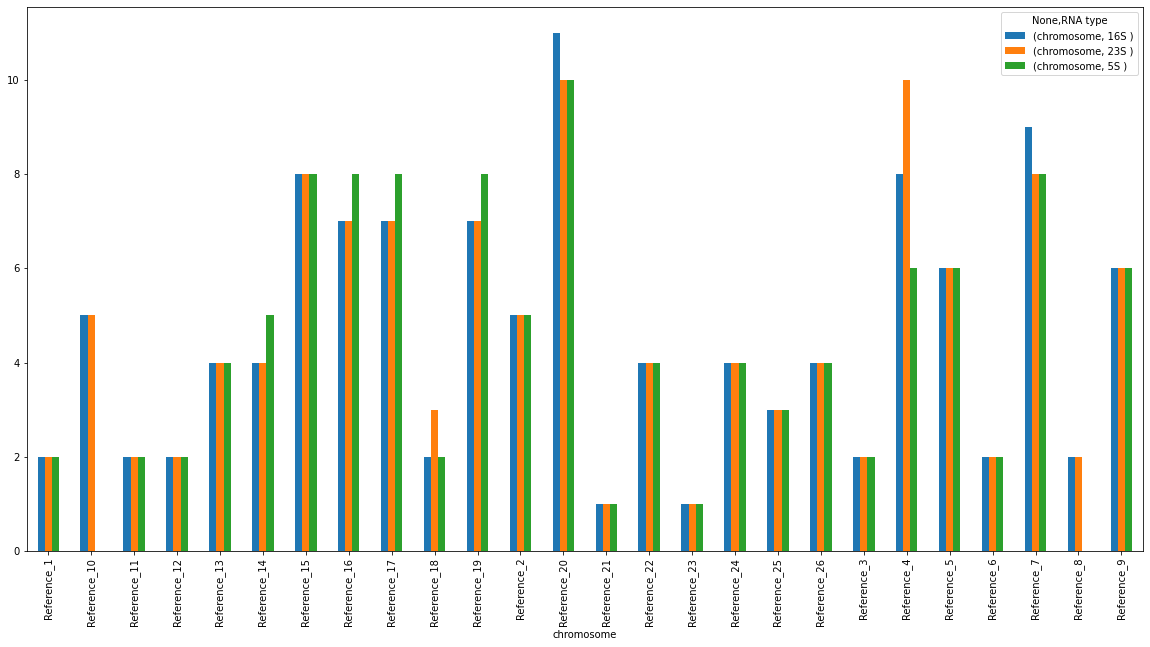

In [10]:
counted_RNAs = gff_table.groupby(['RNA type','chromosome']).agg({'chromosome': 'count'})

counted_RNAs.unstack(0).plot.bar(figsize=(20,10))

Выведите таблицу, содержащую исходные записи об рРНК полностью вошедших в сборку (не фрагментом), а также запись о контиге в который эта РНК попала. Итоговая таблица должна выглядеть примерно так (картинка Example2). Обратите внимание, что в один контиг может попасть несколько рРНК.

In [55]:
gff_table = read_gff('rrna_annotation.gff')
bed_table = read_bed6('alignment.bed')

merged = pd.merge(gff_table, bed_table , how='outer', on=['chromosome'])

merged_new = merged[(merged['end_x'] <= merged['end_y']) & (merged['start_x'] >= merged['start_y'])]
merged_new

,chromosome,source,type,start_x,end_x,score_x,strand_x,phase,RNA type,start_y,end_y,name,score_y,strand_y
129,Reference_11,barrnap:0.9,rRNA,924358,925855,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
156,Reference_11,barrnap:0.9,rRNA,926697,929642,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
183,Reference_11,barrnap:0.9,rRNA,929827,929936,1.400000e-12,+,.,Name=5S_rRNA;product=5S ribosomal RNA,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
215,Reference_11,barrnap:0.9,rRNA,2074460,2075957,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
242,Reference_11,barrnap:0.9,rRNA,2076799,2079744,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121855,Reference_14,barrnap:0.9,rRNA,2433040,2433152,2.000000e-12,-,.,Name=5S_rRNA;product=5S ribosomal RNA,2433027,2433434,NODE_6108_length_407_cov_1153.232955,0,+
122182,Reference_14,barrnap:0.9,rRNA,3766952,3767064,2.000000e-12,-,.,Name=5S_rRNA;product=5S ribosomal RNA,3766939,3767346,NODE_6108_length_407_cov_1153.232955,0,+
122583,Reference_25,barrnap:0.9,rRNA,1329370,1329473,2.900000e-10,-,.,Name=5S_rRNA;product=5S ribosomal RNA,1329345,1329810,NODE_5333_length_465_cov_547.609756,0,-
125060,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,Name=5S_rRNA;product=5S ribosomal RNA,1822575,1823040,NODE_5333_length_465_cov_547.609756,0,+


**Задание 2. Кастомизация графиков (20 баллов)**

Для визуализации данных дифференциальной экспрессии генов, можно использовать специальный тип графика - **volcano plot.** По оси X на нём отложен **logFC (Logarithmic Fold Change) -** во сколько раз изменилась экспрессия гена в степенях двойки (logFC=-8 - экспрессия гена изменилась в 2^-8 раз). По оси Y откладывается уровень значимости данных изменений в виде **отрицательного десятичного логарифма p-value (с поправкой на множественное сравнение).** В данном задании вам нужно максимально точно воспроизвести график **volcano_plot.png** (прикреплён к заданию). Для этого используйте файл с данными **diffexpr_data.tsv.gz** (пандас умеет открывать **.gz** файлы, поэтому разжимать их не обязательно)**. Данные уже предобработаны, считать p-value и брать логарифмы уже не надо**, просто используйте колонки **logFC** и **log_pval**. Если необходимо, можете делать группировку данных или брать subsets, но в итоге на графике должны быть именно значения из этих колонок. Ниже приведён чеклист кастомизаций для удобства, чем больше вы сделаете, тем лучше.

- Четыре сегмента на графике:
    - [ ]  Цвета сегментов
    - [ ]  Разделение сегментов пунктирными линиями
        - [ ]  Серый цвет линий
        - [ ]  Пунктирность линий
        - [ ]  Толщина линий
    - [ ]  Подпись "p_value = 0.05" над соответствующей линией
    - [ ]  Размер точек
- Оси и лейблы
    - [ ]  xlabel, ylabel и title - жирным курсивом, размером +- как на картинке
    - [ ]  Основание логарифма в нижнем регистре
    - [ ]  Размер и толщина ticks на осях X и Y (minor ticks должны отображаться)
    - [ ]  Симметричные лимиты для оси X, но чтобы все данные помещались. Условно, если минимальный **logFC = -1,** а максимальный **logFC = 10,** то значения по оси X должны отображаться от -11 до 11 (+-1 нужно для того, чтобы на график поместилась крайняя точка). Вычислите эти лимиты из данных, а не вбивайте готовые числа
    - [ ]  Толщина осей
    
- Легенда
    - [ ]  Размер и шрифт букв в легенде
    - [ ]  Размер маркеров в легенде
    - [ ]  Небольшая тень от легенды вправо вниз
- Проаннотировать топ-2 генов, **значимо снизивших** экспрессию, и топ-2 генов, **значимо увеличивших** экспрессию
    - [ ]  Стрелочки
        - [ ]  Красные с чёрной гранью
        - [ ]  Направление стрелок - произвольное
    - [ ]  Текст у стрелочек
        - [ ]  Жирный

In [23]:
diff_data = pd.read_csv('diffexpr_data.tsv.gz', sep='\t')

def map_color(logFC, pval_corr):
    if logFC < 0:
        if pval_corr < 0.05:
            return 'Significantly downregulated'
        else:
            return 'Non-significantly downregulated'
    else:
        if pval_corr < 0.05:
            return 'Significantly upregulated'
        else:
            return 'Non-significantly upregulated'
    
diff_data['color'] = diff_data.apply(lambda x: map_color(x.logFC, x.pval_corr), axis = 1)
diff_data

,Sample,logFC,pval,pval_corr,log_pval,color
0,PNLIP,10.092524,6.590327e-01,1.000000e+00,-0.000000,Non-significantly upregulated
1,CELA2A,8.691414,5.823905e-01,1.000000e+00,-0.000000,Non-significantly upregulated
2,CLPS,8.054078,6.517331e-01,1.000000e+00,-0.000000,Non-significantly upregulated
3,MPO,7.817773,4.483336e-01,1.000000e+00,-0.000000,Non-significantly upregulated
4,AMY2A,7.285231,6.324412e-01,1.000000e+00,-0.000000,Non-significantly upregulated
...,...,...,...,...,...,...
20525,SLC12A1,-7.834589,4.993254e-58,1.025115e-53,52.989227,Significantly downregulated
20526,SEMG2,-8.651953,3.989840e-04,1.000000e+00,-0.000000,Non-significantly downregulated
20527,MUC7,-9.196481,3.281804e-07,6.737544e-03,2.171498,Significantly downregulated
20528,SEMG1,-9.313028,3.880575e-04,1.000000e+00,-0.000000,Non-significantly downregulated


In [41]:
# creating sorted datasets

up_reg = diff_data[diff_data['color'] == 'Significantly upregulated'].sort_values(by='logFC', ascending = False)
up_reg

,Sample,logFC,pval,pval_corr,log_pval,color
64,ZIC2,4.571915,4.096640e-08,0.000841,3.075183,Significantly upregulated
88,ZIC5,4.276745,3.686245e-09,0.000076,4.121027,Significantly upregulated
160,CDKN2A,3.790047,1.878280e-08,0.000386,3.413851,Significantly upregulated
218,AMH,3.465240,2.403833e-07,0.004935,2.306707,Significantly upregulated
221,IGF2BP3,3.450535,5.461372e-10,0.000011,4.950309,Significantly upregulated
...,...,...,...,...,...,...
8849,SLC4A1AP,0.191584,1.061339e-06,0.021789,1.661757,Significantly upregulated
8856,CSNK1D,0.191071,2.134895e-06,0.043829,1.358234,Significantly upregulated
8865,UBTF,0.190533,6.790263e-07,0.013940,1.855724,Significantly upregulated
9088,C15orf44,0.177215,9.416174e-07,0.019331,1.713737,Significantly upregulated


In [42]:
down_reg = diff_data[diff_data['color'] == 'Significantly downregulated'].sort_values(by='logFC')
down_reg

,Sample,logFC,pval,pval_corr,log_pval,color
20529,UMOD,-10.661093,3.717350e-57,7.631720e-53,52.117378,Significantly downregulated
20527,MUC7,-9.196481,3.281804e-07,6.737544e-03,2.171498,Significantly downregulated
20525,SLC12A1,-7.834589,4.993254e-58,1.025115e-53,52.989227,Significantly downregulated
20522,NPHS2,-7.524325,1.359887e-34,2.791848e-30,29.554108,Significantly downregulated
20519,MS4A12,-6.893602,3.561712e-22,7.312194e-18,17.135952,Significantly downregulated
...,...,...,...,...,...,...
15019,CUL3,-0.199104,3.976900e-09,8.164576e-05,4.088066,Significantly downregulated
14914,C10orf76,-0.189598,6.069643e-09,1.246098e-04,3.904448,Significantly downregulated
14857,WDR20,-0.184514,5.200393e-07,1.067641e-02,1.971575,Significantly downregulated
14665,OR5K1,-0.165837,2.066955e-06,4.243460e-02,1.372280,Significantly downregulated


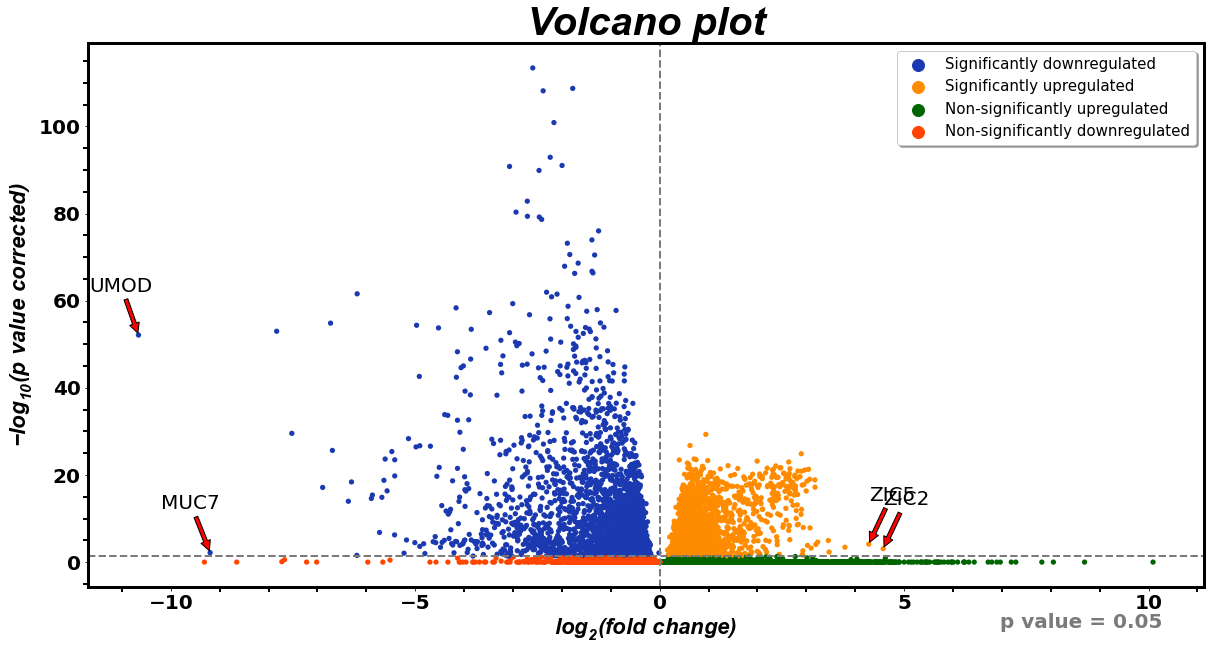

In [59]:
plt.figure(figsize = (20,10))

volc = sns.scatterplot(data = diff_data, x = 'logFC', y = 'log_pval', s = 28,
                       linewidth = 0,
                       hue = 'color',
                       hue_order = ['Significantly downregulated', 'Significantly upregulated', 'Non-significantly upregulated', 'Non-significantly downregulated'],
                       palette = ['#1B39B0', '#FF8C00', '#006400', '#FF4500'])

# Creating vertical and horizontal lines in the middle of a plot

volc.axhline(-np.log10(0.05), ls = '--', lw = 2, c = '#7A7A7A')
volc.axvline(0, ls = '--', lw = 2, c = '#7A7A7A')
volc.annotate('p value = 0.05', xy=(1000, 30), xycoords='figure points', color = '#7A7A7A', weight = 'semibold', size = 20)

# Setting font for labels of axis

font1 = {'family':'arial','color':'black','size':22, 'weight':'bold', 'style':'italic'}

plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.bf'] = 'Arial:italic:bold'

# Names of plot and axis

plt.title('Volcano plot', fontdict = font1, size = 40)
plt.xlabel(r'$\mathbf{\bf{log_2(fold\ change)}}$', fontdict = font1)
plt.ylabel(r"$\mathbf{-log_{10}(p \ value \ corrected)}$", fontdict = font1,)

# Ticks stuff

plt.minorticks_on()

plt.xticks(size = 20, weight = 'bold')
plt.yticks(size = 20, weight = 'bold')
volc.tick_params(axis = 'both', which = 'minor', labelsize = 20, width = 2, size = 5)

# Making axis lines nice and fat

for axis in ['top','bottom','left','right']:
    volc.spines[axis].set_linewidth(3)
    
# Спасибо за все, легенда...

plt.legend(shadow = True, markerscale = 2, fontsize = 15)

# annotations

volc.annotate(up_reg.iloc[0][0],
            xy=(up_reg.iloc[0][1], up_reg.iloc[0][4]),
            xytext=(up_reg.iloc[0][1], up_reg.iloc[0][4] + 10),
            arrowprops=dict(arrowstyle='simple', facecolor='red'), size=20
             )
volc.annotate(up_reg.iloc[1][0],
            xy=(up_reg.iloc[1][1], up_reg.iloc[1][4]),
            xytext=(up_reg.iloc[1][1], up_reg.iloc[1][4] + 10),
            arrowprops=dict(arrowstyle='simple', facecolor='red'), size=20
            )

volc.annotate(down_reg.iloc[0][0],
            xy=(down_reg.iloc[0][1], down_reg.iloc[0][4]),
            xytext=(down_reg.iloc[0][1]-1, down_reg.iloc[0][4] + 10),
            arrowprops=dict(arrowstyle='simple', facecolor='red'), size=20
            )
volc.annotate(down_reg.iloc[1][0],
            xy=(down_reg.iloc[1][1], down_reg.iloc[1][4]),
            xytext=(down_reg.iloc[1][1]-1, down_reg.iloc[1][4] + 10),
            arrowprops=dict(arrowstyle='simple', facecolor='red'), size=20
            );